# Dado X conhecimento

- **dado**:
- Conjunto de valores
- Materia prima da informação(nao tratado)


- **iformação**
- Informação é contextualizada, é o que pode ser inferido atraves dos dados
- "QUantos PS4 foram vendidos em 2020?"

- **Conhecimento**
- "Quais os clientes tem alta probabilidade de comprar um PS4?"
- é uma informação entendida

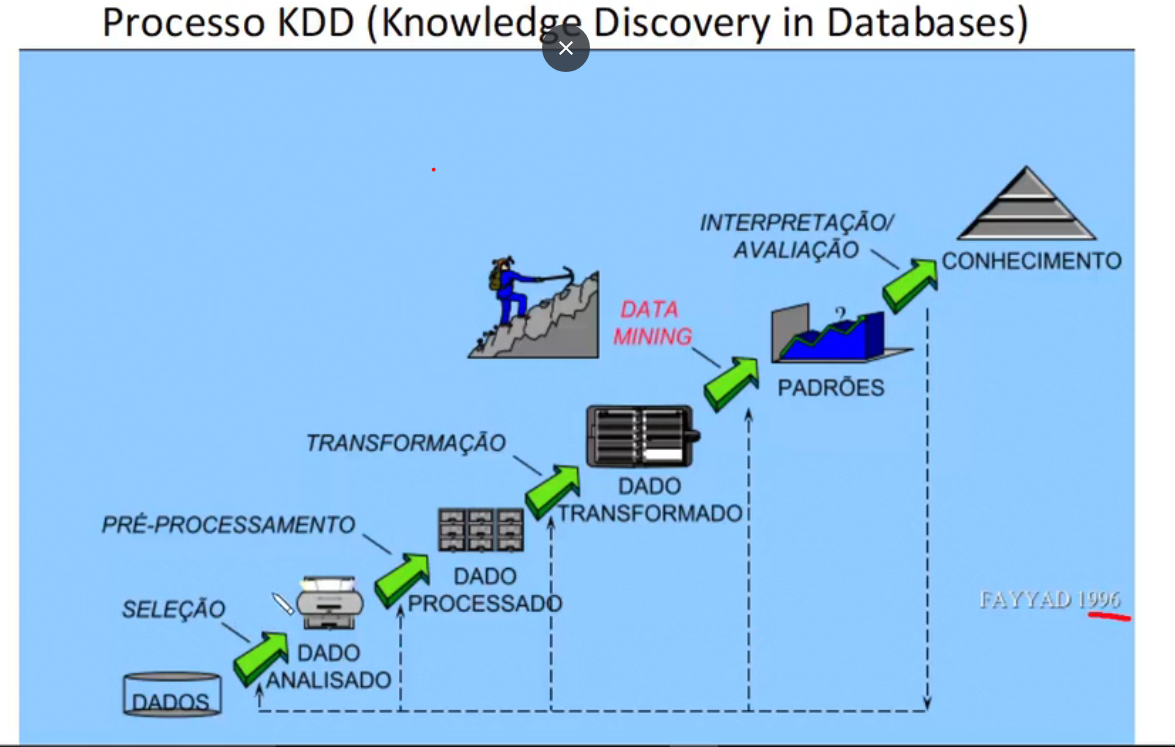

# Regras de associação
teorico

Descobrir um padrão nas coisas, exemplo

```
Geralmente X é comprado junto de Y em um merdado

São regras do tipo se entao

ex: se a pessoa tiver mais de 18 e nao for estudante, entao tem 80% de chance de comprar PS4

homens que vao em final de semana compram cerveja e fraudas
```

- Analisar base de dados e criar associação entre esses dados
- A partir do momento que achamos um padrao entre 2 itens, podemos colocar eles juntos para otimizar as vendas


## Algoritmo apriori

Base de dados onde cada linha representa a compra de um cliente, e as colunas informam quais itens ele comprou, vamos tentar criar regras de associação entre esses produdos

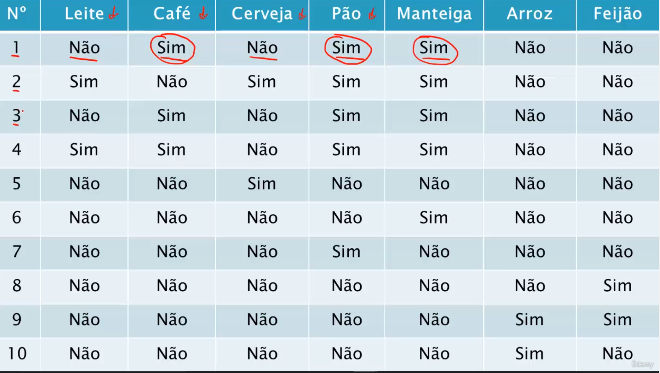

Outra forma de representar a mesma base, python geramente usa esse metodo

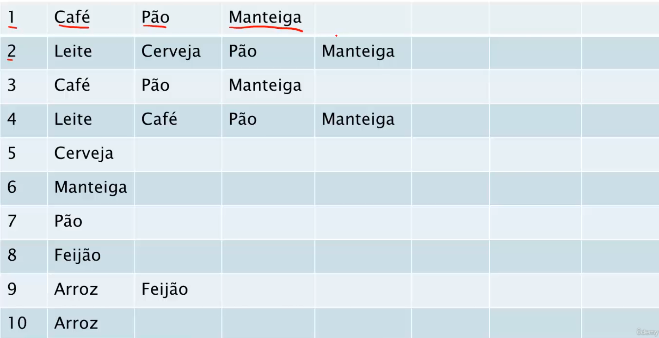

o algoritmo em si


```
Fase 1: descobrir todos os conjuntos de itens com SUPORTE maior ou igual ao minimo especificado pelo usuario

Fase 2: A partir dos conjunto de itens frequentes, descobrir regras de associação com fator de CONFIANÇA maior ou igual ao especificado pelo usuario
```

usuario pode especificar um valor de suporte grande, para buscar itens que aparecem com frequencia, ou um valor baixo, procurando por itens que aparecem pouco


- **Suporte**: Frequencia na qual um item aparece na base de dados


```
Suporte pão = 5 / 10 = 0.5 -> 50%
(numero de transações que tem pao /  total transação)


```



- **Confiança**:


```
Dada uma rega SE x ENTAO y

Confiança = (registros que tem x e y) / (registros que tem x)
```



## **Aplicando na nossa base**



**PASSO 01. SUPORTE**

```
Suporte >= 0.3 # Determinado pelo usuario

01. Calculando suporte de conjuntos com 1 item(itemsets)

  leite - 0.2
  cafe - 0.3    <-- suporte na faixa
  cerveja - 0.2
  pao - 0.5     <-- suporte na faixa
  manteiga - 0.5   <-- suporte na faixa
  arroz - 0.2
  feijão - 0.2


02. Calculando suporte de conjuntos com 2 itens

  vamos medir a frequencia que os itens sao vendidos em CONJUNTO

  Cafe e Pão - 0.3
  Cafe e Manteiga - 0.3
  Pão e Manteiga - 0.4

  Todos passam no suporte


0.3 Calculando o suporte de conjunto de 3 itens

  Cafe, Pão, Manteiga - 0.3

  Vamos fazer a montagem de regras de associação para os conjuntos que passaram

```



 **PASSO 02. CONFIANÇA**
```
Conficança >= 0.8 # Determinado pelo usuario

01. Regras para {Cafe, Pao}
  SE Cafe ENTÃO pao - 3/3 = 1  <-- Passou na confiança
  SE pao ENTÃO cafe - 3/5 = 0.6

02. Regras para {Cafe, Manteiga}
  SE cafe ENTAO manteiga - 3/3 = 1 <-- Passou na confiança
  SE manteiga ENTAO cafe - 3/5 = 0.6

03. Regras para {pao, Manteiga}
  SE pao ENTAO manteiga - 4/5 = 0.8 <-- Passou na confiança
  SE manteiga ENTAO pao - 4/5 = 0.8 <-- Passou na confiança

04. Regras para{cafe, pao, manteiga}
  SE(cafe, pao) ENTAO manteiga - 3/3 = 1 <-- Passou na confiança
  SE(cafe, manteiga) ENTAO pao - 3/3 = 1 <-- Passou na confiança
  SE(manteiga, pao) ENTAO cafe - 3/4 = 0.75
  SE(cafe) ENTAO (pao,manteiga) - 3/3 = 1 <-- Passou na confiança
  SE(pao) ENTAO (cafe,manteiga) - 3/5 =0.6
  SE(manteiga) ENTAO (pao,cafe) - 3/5 = 0.6

```

Calculando o LIFT: Escolhendo as melhores regras, escolhendo as mais relevantes entre elas


```
Regras finais:
  SE Cafe ENTÃO pao - 3/3 = 1
  SE cafe ENTAO manteiga - 3/3 = 1
  SE pao ENTAO manteiga - 4/5 = 0.8
  SE manteiga ENTAO pao - 4/5 = 0.8
  SE(cafe, pao) ENTAO manteiga - 3/3 = 1
  SE(cafe, manteiga) ENTAO pao - 3/3 = 1
  SE(cafe) ENTAO (pao,manteiga) - 3/3 = 1

LIFT = confiança(X, Y) / Suporte(Y)
  SE Cafe ENTÃO pao - 1 / 0.5 = 2(Clientes que compram cafe tem duas vezes mais chances de comprarem pão)
  SE cafe ENTAO manteiga - 1 / 0.5 = 2
  SE pao ENTAO manteiga - 0.8 / 0.5 = 1.6
  SE manteiga ENTAO pao - 0.8 / 0.5 = 1.6
  SE(cafe, pao) ENTAO manteiga - 1 / 0.5 = 2
  SE(cafe, manteiga) ENTAO pao - 1 / 0.5 = 2
  SE(cafe) ENTAO (pao,manteiga) - 1 / 0.4 = 2.4

```

A partir do LIFT, escolhemos as melhores regras, fazendo um rankeamento


# Regras de associação
implementação

## base dados mercado

In [1]:
import pandas as pd
base_mercado = pd.read_csv('/content/drive/MyDrive/Mineração de Regras de Associação com python, Apriori e SQL/Mineração de Regras de Associação com Python, Apriori e SQL/mercado.csv', header = None) # Quando nao temos cabeçalho no dataframe, temos que especificar
base_mercado

,0,1,2,3
0,leite,cerveja,pao,manteiga
1,cafe,pao,manteiga,NaN
2,cafe,pao,manteiga,NaN
3,leite,cafe,pao,manteiga
4,cerveja,NaN,NaN,NaN
5,manteiga,NaN,NaN,NaN
6,pao,NaN,NaN,NaN
7,feijao,NaN,NaN,NaN
8,arroz,feijao,NaN,NaN
9,arroz,NaN,NaN,NaN


In [2]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=6e0a7c332186054c755f1de2588fde00720305b754f6602d4bbb4bc85073a771
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [3]:
from apyori import apriori

In [4]:
# Colocando os dados na segunda forma da parte teorica, exigido pelo apyyorri
transacoes = []
for i in range(10):
  #print(base_mercado.values[i]) # Vai mostrar as linhas
  transacoes.append([str(base_mercado.values[i, j]) for j in range(4)]) # Pegando todos os valores da linha i

In [5]:
transacoes

[['leite', 'cerveja', 'pao', 'manteiga'],
 ['cafe', 'pao', 'manteiga', 'nan'],
 ['cafe', 'pao', 'manteiga', 'nan'],
 ['leite', 'cafe', 'pao', 'manteiga'],
 ['cerveja', 'nan', 'nan', 'nan'],
 ['manteiga', 'nan', 'nan', 'nan'],
 ['pao', 'nan', 'nan', 'nan'],
 ['feijao', 'nan', 'nan', 'nan'],
 ['arroz', 'feijao', 'nan', 'nan'],
 ['arroz', 'nan', 'nan', 'nan']]

In [6]:
# Vai criar as regras
regras = apriori(transacoes, min_support=0.3, min_confidence=0.8, min_lift=2, min_lenght=2)
resultados = list(regras)
resultados

[RelationRecord(items=frozenset({'cafe', 'manteiga'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)]),
 RelationRecord(items=frozenset({'pao', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0)]),
 RelationRecord(items=frozenset({'pao', 'cafe', 'manteiga'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao', 'manteiga'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'cafe', 'manteiga'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'pao', 'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])]

In [7]:
len(resultados) # Mosatra o numero de conjuntos(um conjunto pode ter mais de uma regra)

3

In [8]:
# Mostra o conjunto 2
resultados[2][0]

frozenset({'cafe', 'manteiga', 'pao'})

In [9]:
#  Pegta todas as regras para o conjunto 1
#resultados[35][2]
for i in range(len(resultados[2][2])):
  print(resultados[2][2][i])

OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao', 'manteiga'}), confidence=1.0, lift=2.5)
OrderedStatistic(items_base=frozenset({'cafe', 'manteiga'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0)
OrderedStatistic(items_base=frozenset({'pao', 'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)


In [10]:
# Deixando mais facil de visualizar
resultados_formatado = []
for i in range(len(resultados)):
    resultados_formatado.append([list(x) for x in resultados[i][2]])

len(resultados_formatado)

3

In [11]:
resultados_formatado

[[[frozenset({'cafe'}), frozenset({'manteiga'}), 1.0, 2.0]],
 [[frozenset({'cafe'}), frozenset({'pao'}), 1.0, 2.0]],
 [[frozenset({'cafe'}), frozenset({'manteiga', 'pao'}), 1.0, 2.5],
  [frozenset({'cafe', 'manteiga'}), frozenset({'pao'}), 1.0, 2.0],
  [frozenset({'cafe', 'pao'}), frozenset({'manteiga'}), 1.0, 2.0]]]

## Base mercado real

In [12]:
base_mercado_franca = pd.read_csv('/content/drive/MyDrive/Mineração de Regras de Associação com python, Apriori e SQL/Mineração de Regras de Associação com Python, Apriori e SQL/mercado2.csv')
base_mercado_franca.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
base_mercado_franca.shape

(7500, 20)

In [14]:
# Deixando no formato adequado pro algoritmo
transacoes = []
for i in range(len(base_mercado_franca)):
  transacoes.append([str(base_mercado_franca.values[i, j]) for j in range(20)])

In [15]:
len(transacoes)

7500

In [16]:
print(transacoes)

[['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['whole wheat pasta', 'french fries', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['soup', 'light cream', 'shallot', 'nan', 'nan', 'nan'

In [17]:
# Vai criar as regras
regras = apriori(transacoes, min_support=0.003, min_confidence=0.2, min_lift=3, min_lenght=2)
resultados = list(regras)
len(resultados)

160

In [18]:
# Deixando mais facil de visualizar
resultados_formatado = []
for i in range(len(resultados)):
    # Para cada item_set, vamos criar uma lista de todas as suas regras
    resultados_formatado.append([list(x) for x in resultados[i][2]]) # Vai pegar todas as regras de cada conjutno

len(resultados_formatado)

160

Resultado formatado é uma lista das regras de cada conjunto

In [19]:
resultados_formatado[50]

[[frozenset({'tomato sauce'}),
  frozenset({'ground beef', 'spaghetti'}),
  0.2169811320754717,
  5.535232961108973],
 [frozenset({'ground beef', 'tomato sauce'}),
  frozenset({'spaghetti'}),
  0.5750000000000001,
  3.302067381316999],
 [frozenset({'spaghetti', 'tomato sauce'}),
  frozenset({'ground beef'}),
  0.48936170212765956,
  4.979935910390022]]